In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import rcParams

In [6]:
pd.options.display.max_columns= None
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [7]:
df = pd.read_csv('smote_dataset.csv')
df = df.drop(columns='Unnamed: 0',axis=1)
df

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_Armed forces,Profession_Managers,Profession_Professionals,Profession_Service and sales workers,Profession_Technicians and associate professionals,STATE_Central,STATE_East,STATE_North,STATE_South,STATE_West,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,Risk_Flag
0,1303834,23,3,3,13,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,7574516,40,10,9,13,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
2,3991815,66,4,4,10,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
3,6256451,41,2,2,12,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1
4,5768871,47,11,3,14,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87205,974378,44,2,2,11,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
87206,3592015,24,14,10,12,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1
87207,5825326,48,2,2,12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
87208,2516948,56,3,2,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


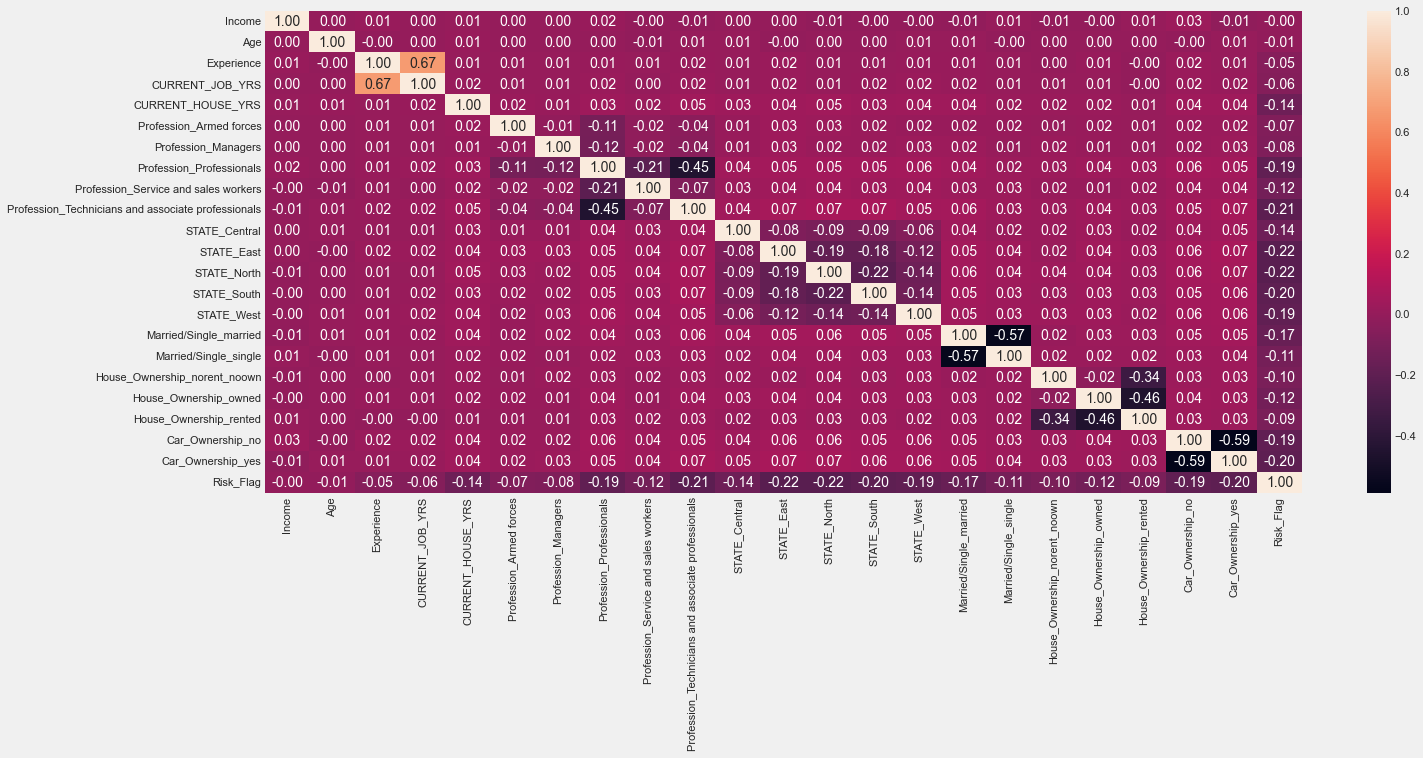

In [8]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

#### Fetures Scalling using standard scaller

In [9]:
from sklearn.preprocessing import StandardScaler

# initiating features and label
# x features y label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#scalling dataset
sc = StandardScaler()
X = sc.fit_transform(X)

#### Splitting into train and test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 900)

In [11]:
print(X_train.shape[0]== y_train.shape[0],X_test.shape[0] == y_test.shape[0])

True True


#### Training the Data using Knn model


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,accuracy_score,recall_score,auc,roc_curve

In [16]:
k_range = range(1,10)
eval_precision_knn = []
eval_accuracy_knn = []
eval_recall_knn = []
eval_auc_knn = []
#distance calculation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    y_pred_proba_knn = knn.predict_proba(X_test)
    eval_precision_knn.append(precision_score(y_test, y_pred_knn))
    eval_accuracy_knn.append(accuracy_score(y_test, y_pred_knn))
    eval_recall_knn.append(recall_score(y_test, y_pred_knn))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn[:,1], pos_label=1)
    eval_auc_knn.append(auc(fpr, tpr))

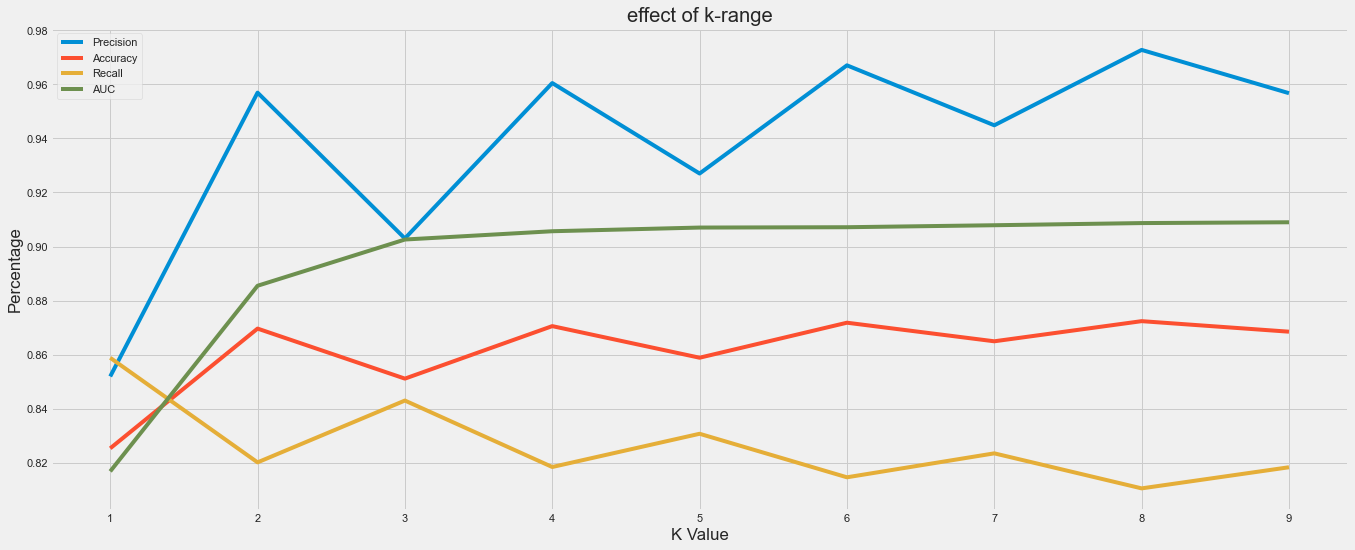

In [18]:
sns.lineplot(k_range,eval_precision_knn,label='Precision')
sns.lineplot(k_range,eval_accuracy_knn,label='Accuracy')
sns.lineplot(k_range,eval_recall_knn,label='Recall')
sns.lineplot(k_range,eval_auc_knn,label='AUC')

plt.title('effect of k-range')
plt.xlabel('K Value')
plt.ylabel('Percentage')
plt.show()

#### Confusion Metrics

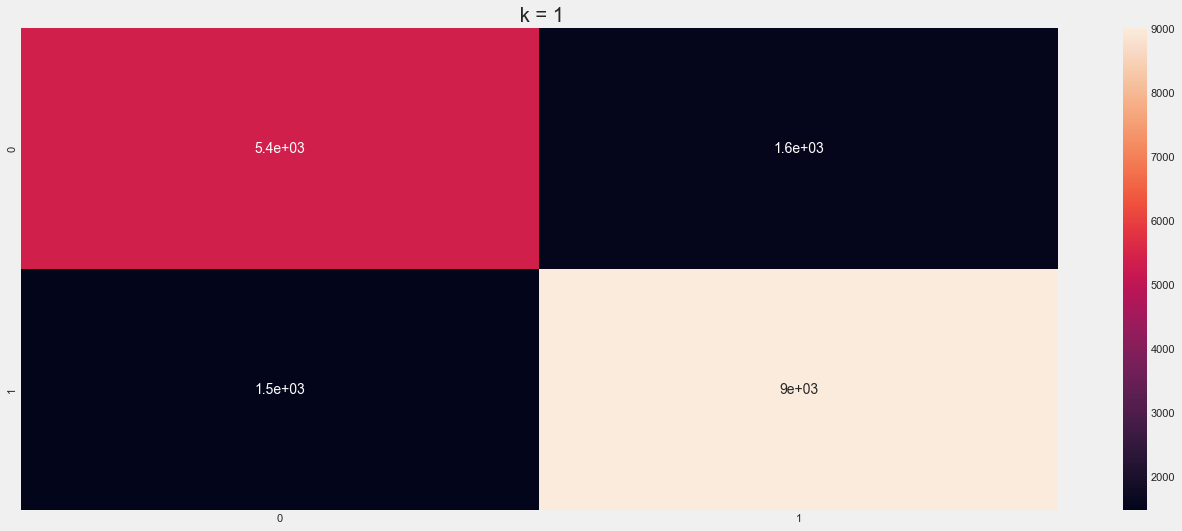

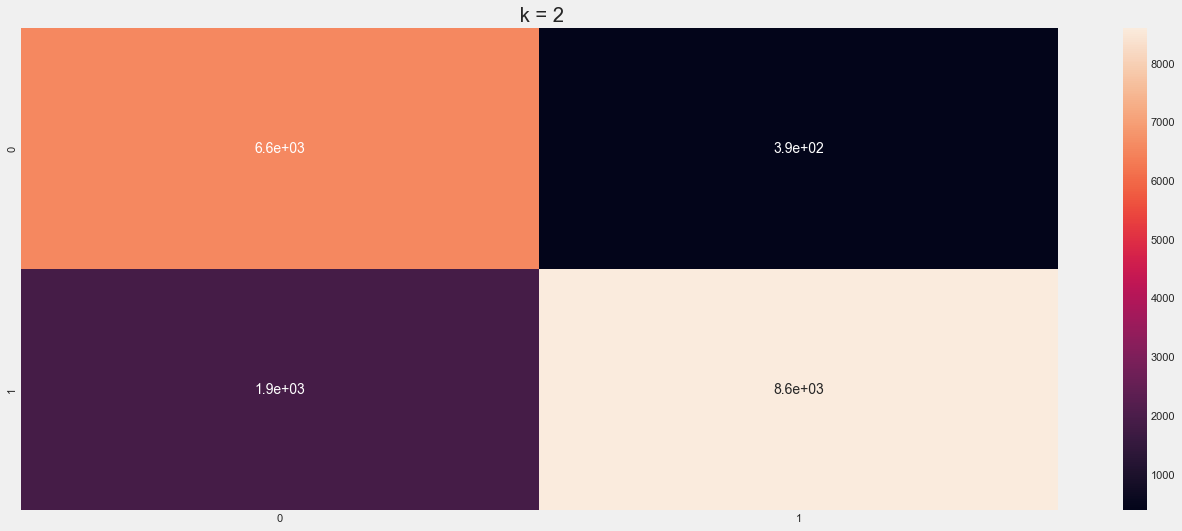

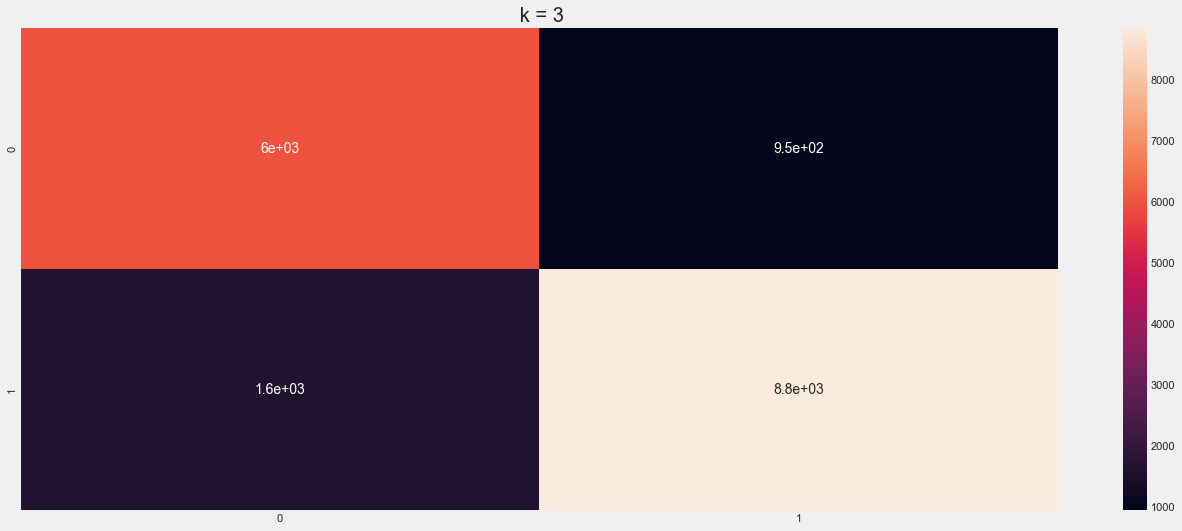

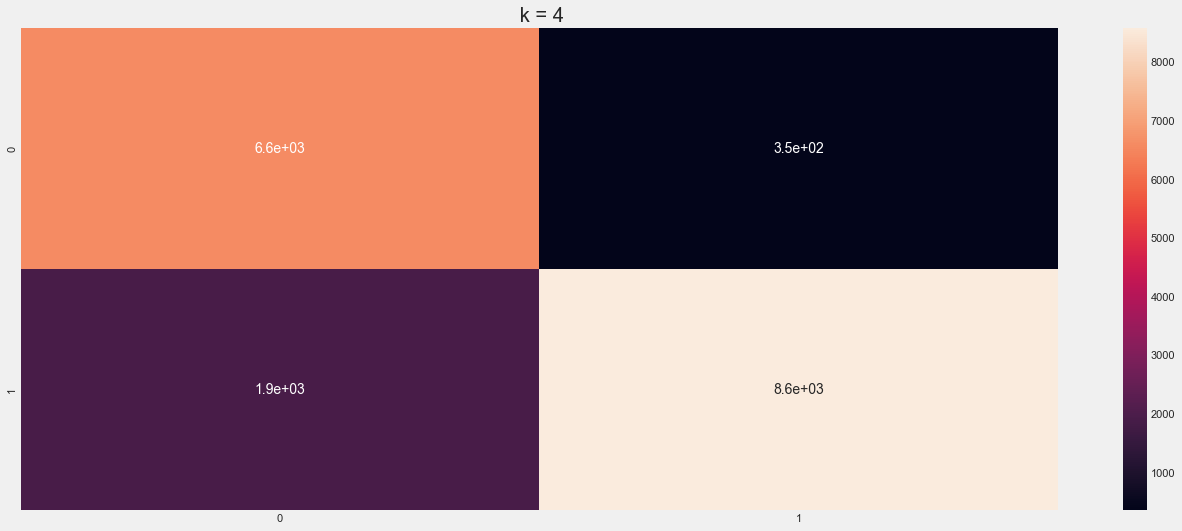

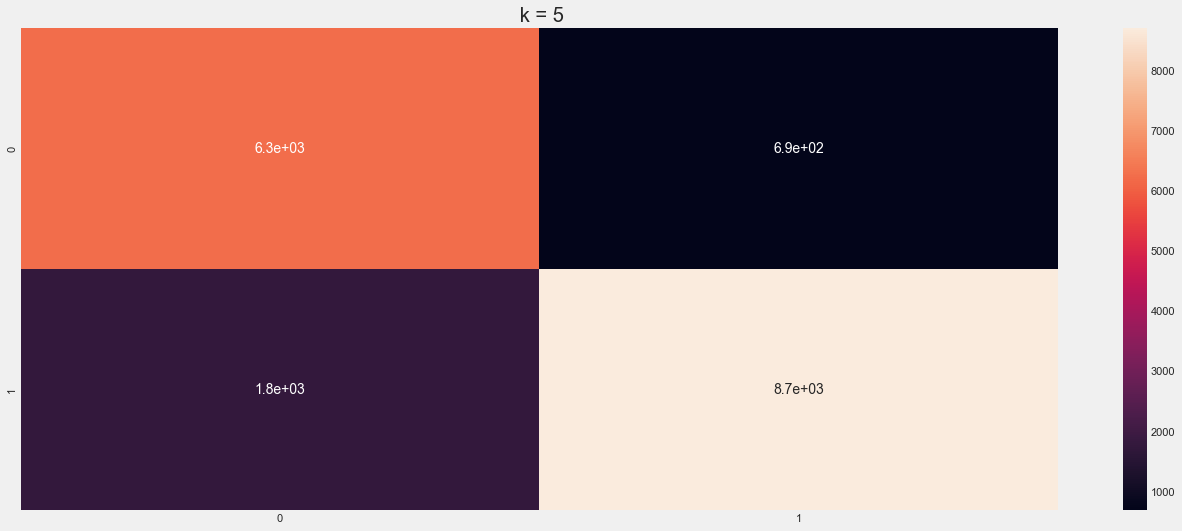

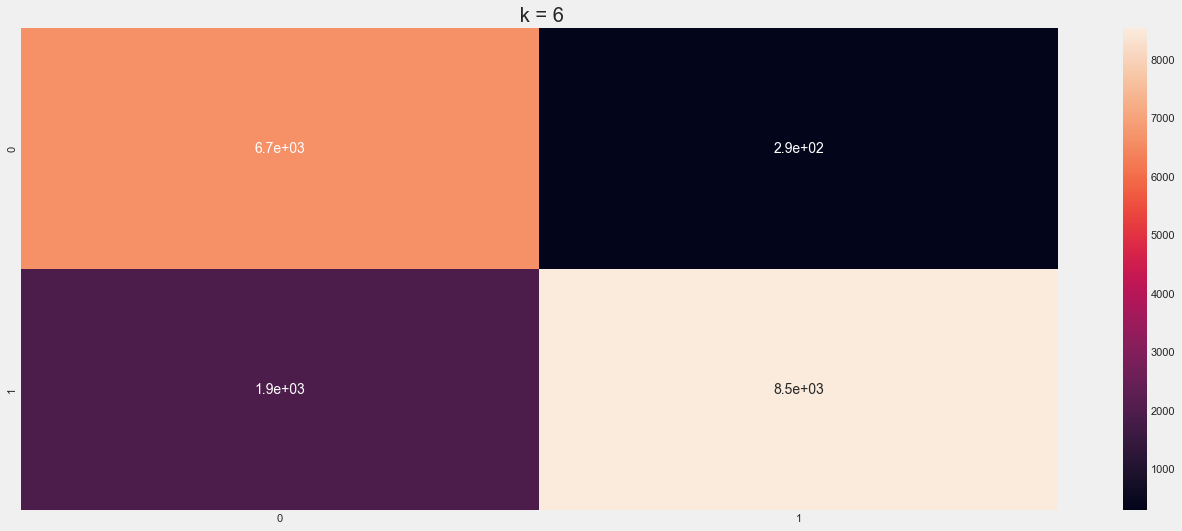

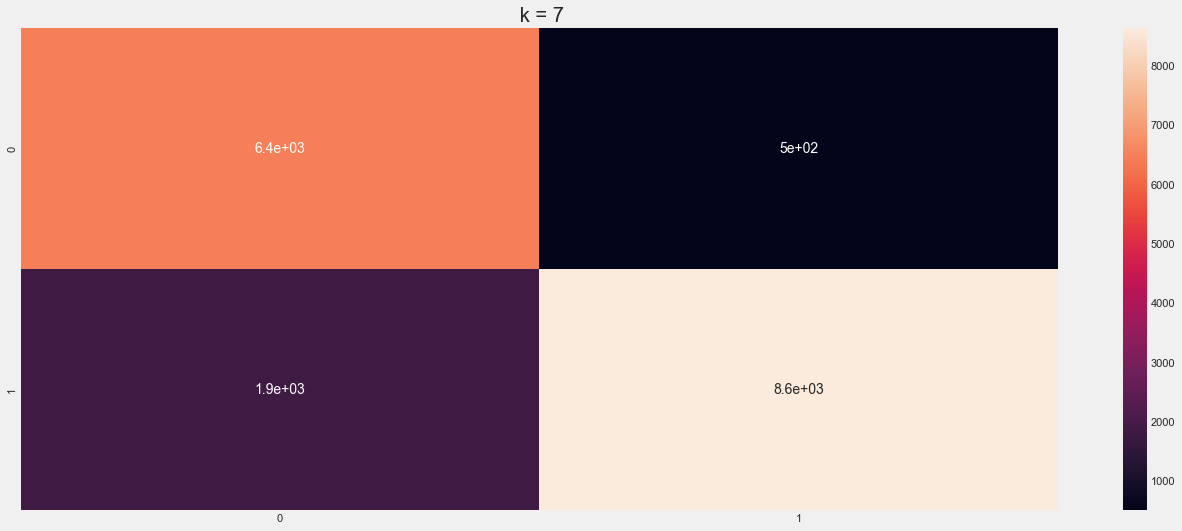

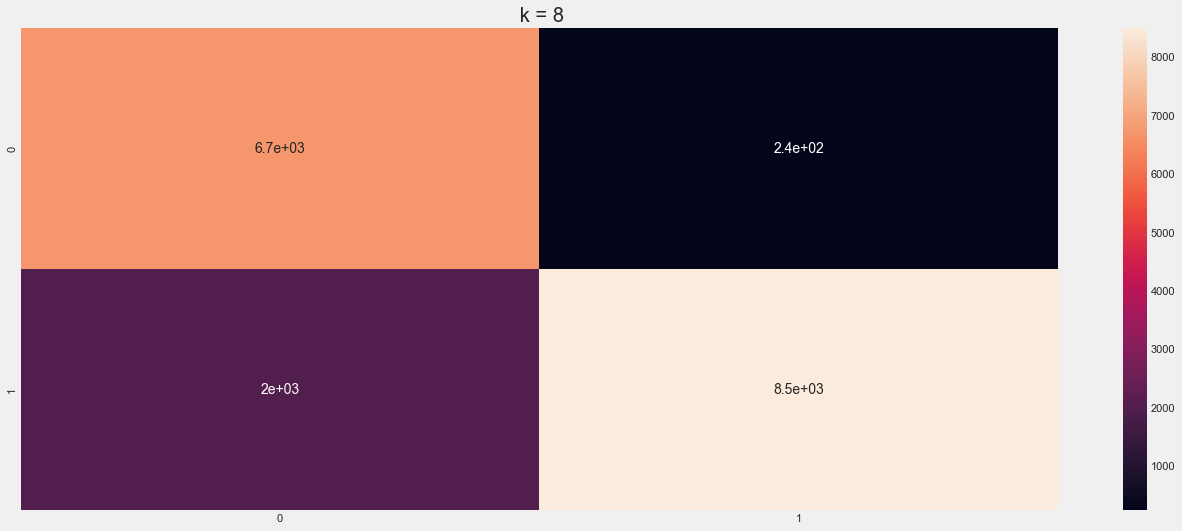

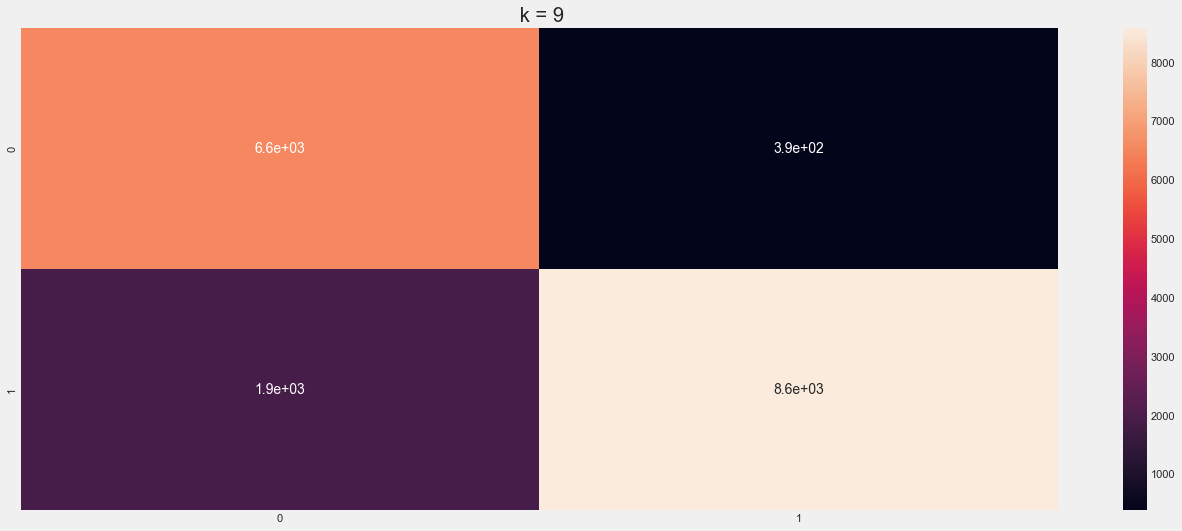

In [19]:
from sklearn.metrics import confusion_matrix
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cf_matrix = confusion_matrix(y_test,y_pred)
    
    sns.heatmap(cf_matrix,annot=True)
    plt.title(f" k = {k}")
    plt.show()

#### Decision Tree

In [21]:
from sklearn import tree
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred_d_tree = d_tree.predict(X_test)
y_pred_d_tree_prob = d_tree.predict_proba(X_test)
y_pred_d_tree_train = d_tree.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_d_tree_prob[:,1], pos_label=1)

In [40]:
print("precision:%.2f"%precision_score(y_test, y_pred_d_tree))
print("accuracy:%.2f"% accuracy_score(y_test, y_pred_d_tree))
print("recall:%.2f"% recall_score(y_test, y_pred_d_tree))
print("auc:%.2f"% auc(fpr, tpr))

precision:0.85
accuracy:0.82
recall:0.86
auc:0.81
